## <center> Tecnológico de Monterrey
### <center> Modelación de sistemas multiagentes con gráficas computacionales. (TC2008B.1) <br>M1. Actividad<br><br>Manolo Ramírez Pintor<br>A01706155<br>ITESM Campus Querétaro<br>19/11/2021<br>

# Actividad del Módulo 1

## Limpieza mediante robots tipo agentes
En esta tarea se nos pide realizar un informe y un programa que observe las estadísitcas de un robot de limpieza reactivo.

## Reglas
**Tenemos que poder dar los siguientes datos:**
 1. Tamaño del grid
 2. Número de agentes (robots) que intentarán limpiar
 3. Porcentaje de celdas inicialmente sucias
 4. Tiempo máximo de ejecución

**Procedimiento que debemos meter:**
1. Inicializar las celdas sucias 
2. Inicializar los agentes en [1,1

**Ejecución del programa**
1. Si el agente se encuentra en una celda sucia, se limpia
2.  Si el agente está en una celda limpia, este se desplaza a una dirección aleatoria dentro del rango de celdas que se puede desplazar a su alrededor (8), si no se puede mover, se va a quedar donde mismo.
3. Debe existir un tiempo de ejecución máximo para que el programa no corra para siempre en caso de que algo raro pase. 

**Depués de que se ejecute...**
Se debe poder ver:
1. El tiempo en el que las celdas se limpiaron
2. Porcentaje de celdas que pudieron limpiarse
3. El numero de movimientos realizado por los agentes

**Adicionalmente...**
En el documento se debe mostrar *"¿Cómo la cantidad de agentes impacta al tiempo que toma en limpiar las celdas?"*

## Librerías a utilizar

Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model). Cada modelo puede contener múltiples agentes.<br>
`from  mesa  import  Agent, Model`<p>

Debido a que existen múltiples agentes, tenemos que usar ''MultiGrid''.<br>
`from  mesa.space  import  MultiGrid` <p>

Con ''SimultaneousActivation'', hacemos que todos los agentes puedan moverse ''al mismo tiempo''.<br>
`from  mesa.time  import  SimultaneousActivation`<p>

Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.<br>
`from  mesa.datacollection  import  DataCollector`<p>

Matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.<br>
`%matplotlib inline`<br>
`import  matplotlib`<br>
`import  matplotlib.pyplot  as  plt`<br>
`import  matplotlib.animation  as  animation`<br>
`plt.rcParams["animation.html"] = "jshtml"`<br>
`matplotlib.rcParams['animation.embed_limit'] = 2**128`<p>

Importamos los siguientes paquetes para el mejor manejo de valores numéricos.<br>
`import  numpy  as  np` <p>

  
Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.<br>
`import  time`<br>
`import  datetime`<p>

Importamos random para poder generar números de forma aleatoria<br>
`import  random` <p>

In [16]:
# Todas las librerias que vamos a utilizar

# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model 

# Debido a que existen múltiples agentes, tenemos que usar ''MultiGrid''.
from mesa.space import MultiGrid

# Con ''SimultaneousActivation'', hacemos que todos los agentes puedan moverse ''al mismo tiempo''.
from mesa.time import SimultaneousActivation

# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

# Importamos random para poder generar números de forma aleatoria
import random

In [17]:
def get_grid(model):
    # Esta función nos permite obtener el estado de los diferentes agentes.
    grid = np.zeros( (model.grid.width, model.grid.height) )
    
    for (content, x, y) in model.grid.coord_iter():
        grid[x][y] = model.sucia[x][y]
    
    return grid

class RoombaAgent(Agent):
    """ Mediante RoombaAgent vamos a crer varios individuos del modelo (o los Robots) que se 
        estarán encargando de revisar cada celda y limpiarla en caso de que esté sucia. """
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    def step(self):  
        """ Dentro de cada Robot vamos a ver las direcciones posibles a las que el agente se 
            puede mover de acuerdo a las reglas que establecimos. (Por cada paso o step) """
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
        if self.model.sucia[self.pos[0]][self.pos[1]] == 1:
            self.model.sucia[self.pos[0]][self.pos[1]] = 0
            self.model.c_sucias -= 1

class RoombaModel(Model):
    # Define nuestro modelo, los agentes y su entorno
    """ En nuestro RoombaModel vamos a manejar el control o el comportamiento 
        de cada agente de acuerdo a su posición y también vamos a establecer 
        si una celda de nuestro grid tiene el estado de limpio o sucio. """
    def __init__(self, width, height, agents, sucias):
        self.num_agents = agents
        self.c_sucias = sucias
        self.grid = MultiGrid(width, height, True)
        self.sucia = np.zeros( (self.grid.width, self.grid.height), dtype=float)
        self.schedule = SimultaneousActivation(self)

        # Pone todos los agentes creados en la posición [1,1]
        for i in range (self.num_agents):
            a = RoombaAgent(i, self)
            self.grid.place_agent(a, (1, 1))
            self.schedule.add(a)

        # Crear las celdas sucias de acuerdo numero de celdas recibidos                                
        i = self.c_sucias-1   
        while(i >= 0):
            if self.sucia[random.randint(0,self.grid.width-1)][random.randint(0,self.grid.height-1)] == 0:
                self.sucia[random.randint(0,self.grid.width-1)][random.randint(0,self.grid.height-1)] = 1
                i = i - 1

        # Inicializa un recolector de datos
        self.datacollector = DataCollector(model_reporters={"Grid": get_grid})

    def step(self):
        """ Ejecuta un paso de la simulación, recolectando los datos."""
        self.datacollector.collect(self)                                              
        self.schedule.step()
        if self.c_sucias == 0:
            self.datacollector.collect(self)

## Variables (modificables)

`M`: Es el ancho del grid a generar.<br>
`N`: Es el alto del grid a generar.<br>
`AGENTES`: Es el número de robots (o agentes) a generar.<br>
`PORCT_SUCIEDAD`: Es el porcentaje de celdas sucias que vamos a establecer.<br>
`T_MAX`: Tiempo máximo de ejecución que le vamos a dar oportunidad al programa de ejecutarse.<p>

Después de que las variables entren, vamos a crear una variable `iteraciones` para que podamos saber cuantas fueron y tambien vamos a crear la variable `sucias` para calcular las celdas totales sucias de acuerdo al porcentaje dado y el tamaño de nuestro grid.<p>

A continuación vamos a calcular el tiempo, inicializaremos el modelo y daremos pasos hasta que ya no exista ninguna celda sucia. El `datacollector` se encargará de recibir toda la información de lo que está pasando.<p>

Finalmente vamos a imprimir lo que salió de la simulación.

In [18]:
# Variables modificables
M = 25 # Con mas de 35 a veces anim no funciona
N = 25
AGENTES = 40 # Pueden ser los agentes que sean
PORCT_SUCIEDAD = 50 # de 0 a 100
T_MAX = 3.0 # Tiempo maximo de ejecucion dependiente del 

# Variables adicionales (NO MOVER)
iteraciones = 0 # Numero de iteraciones actual

# Calcular el num de celdas sucias dependiendo del tamaño
sucias = int((PORCT_SUCIEDAD/(M*N))*100)

# Iniciar contador de tiempo y el modelo
start_time = time.time()
model = RoombaModel(M, N, AGENTES, sucias)

# Ejecutar el modelo a pasos hasta que ya no exista ninguna celda sucia
# o se llegue a exceder el tiempo maximo establecido de ejecución
while sucias > 0 and time.time() - start_time < T_MAX:
    model.step()
    sucias = model.c_sucias
    iteraciones += 1

# Imprimir todos los resultados (hay uno adicional por debug)
print('¿Cuánto tardó en ejecutarse?:', str(datetime.timedelta(seconds=(time.time() - start_time))))
print('Porcentaje de limpieza exitosa:', ((M*N-sucias)/(M*N))*100)
print('Numero de iteraciones total:', iteraciones)
print('Numero de movimientos en total:', iteraciones*AGENTES)

¿Cuánto tardó en ejecutarse?: 0:00:00.161558
Porcentaje de limpieza exitosa: 100.0
Numero de iteraciones total: 71
Numero de movimientos en total: 2840


## Informacion recolectada

Al acabar la simulación, vamos a utilizar a Pandas para luego poder desplegar la información de manera gráfica.

In [19]:
# Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.
all_grid = model.datacollector.get_model_vars_dataframe()

## Graficación inicial

Mediante `matplotlib` vamos a graficar la informacion que metimos a nuestra variable generada a través de Pandas.

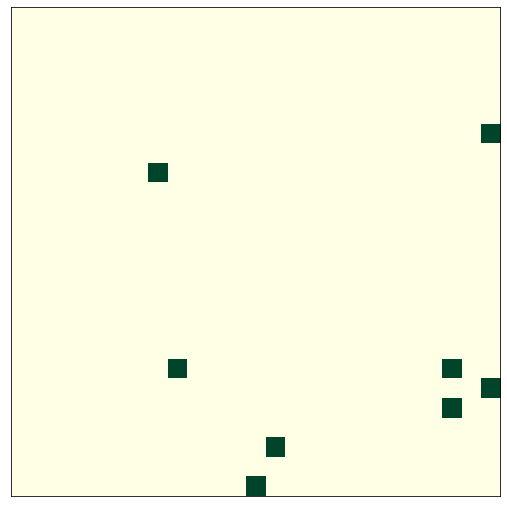

In [20]:
# Graficamos la información usando `matplotlib`
# %%capture

fig, axs = plt.subplots(figsize=(8,8))
axs.set_xticks([])
axs.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.YlGn)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])

anim = animation.FuncAnimation(fig, animate, frames=iteraciones+1)

## Animacion

Al final de todo, vamos a ver la animacion de la simulacion de todos los datos recolectados. Esta se generara a través de una librería que convertirá todo a formato HTML5.

In [21]:
anim

## Análisis y conclusiones
Si cambiamos los agentes a que sean más, podemos observar que la limpieza será más rápida porque entre más agentes existe una posibilidad más alta de que los agentes lleguen a las celdas indicadas como sucias. Si ponemos más agentes existen más movimientos también y si ponemos menos agentes existen menos movimientos pero más iteraciones. 
<p>(A veces es muy variable, eso es curioso al ser generado de forma muy aleatoria)

## Reflexión

En esta actividad investigué más acerca de mesa y me puse a jugar mucho con el comportamiento de los agentes. En cierto momento a veces no se limpiaba nada y las celdas sucias aparecían casi al completo del grid pero por un calculo erróneo. Bueno esto en sí también me dejó aprendizajes bastante importantes porque me permitieron pensar en un entorno de lo que sucedería al cambiar variables y al relacionarlo con la vida real. En sí al ser aleatorio pues pensé que sería no tan eficiente pero entre más agentes pues más rápido es. <p>
Cada situación generada es curiosa y pues esto hace sentir que puede aplicarse de cierta forma aunque no es la mejor. Lo padre de esto es que las simulaciones las puedes generar como animaciones y observar los comportamientos que se pueden llegar a tener a partir de las reglas establecidas. Al final esto puede servir muchísimo para tomar informes estadísiticos para analizar modelos matemáticos o modelos de otros tipos.
<p> Estuvo padre. Gracias! :)